# Part 1: Logistic Regression (Linear)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
# Load the dataframe and select the first 300 rows (75% For Training and 25% for Testing)
df = pd.read_csv('/content/exam_scores.csv')
df = df.iloc[0:300,:]
df.head()


,Exam Score1,Exam Score2,Pass
0,22.99,43.42,0
1,4.32,64.49,0
2,52.59,52.69,1
3,11.90,24.99,0
4,52.37,45.93,0


In [3]:
# Display descriptive statistics of the dataframe
df.describe()

,Exam Score1,Exam Score2,Pass
count,300.000000,300.000000,300.000000
mean,49.735100,53.264433,0.266667
std,28.630996,29.728245,0.442956
min,0.240000,0.460000,0.000000
25%,23.765000,27.227500,0.000000
50%,50.030000,54.570000,0.000000
75%,76.795000,81.495000,1.000000
max,99.640000,99.990000,1.000000


## --- Feature Engineering ---


In [4]:
# Insert a column of ones at the beginning of the dataframe
df.insert(0,'Ones',1)
col = df.shape[1]

# Create the feature matrix (Xv) and target variable vector (yv)
Xv = df.iloc[:,0:col-1]
yv = df.iloc[:,col-1:col]

print(Xv.shape)
print(yv.shape)
# print(Xv)
# print(yv)

(300, 3)
(300, 1)
     Ones  Exam Score1  Exam Score2
0       1        22.99        43.42
1       1         4.32        64.49
2       1        52.59        52.69
3       1        11.90        24.99
4       1        52.37        45.93
..    ...          ...          ...
295     1         3.90        67.97
296     1        57.00        99.16
297     1        85.48        31.77
298     1        74.93         5.11
299     1        67.49        49.87

[300 rows x 3 columns]
     Pass
0       0
1       0
2       1
3       0
4       0
..    ...
295     0
296     1
297     0
298     0
299     0

[300 rows x 1 columns]


## --- Convert to Numpy arrays ---


In [5]:
# Convert Xv and yv to numpy arrays
Xv = np.array(Xv.values)
yv = np.array(yv.values)
print(Xv.shape)
print(yv.shape)

# Initialize theta to a zero vector of size 3
theta = np.zeros(3) # (3,1)

(300, 3)
(300, 1)


## --- Define the sigmoid, cost and gradient functions ---


In [6]:
# Define the sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Define the cost function
def cost(X,y,thetas):
  thetas = np.reshape(thetas, (len(thetas), 1))  # Reshape theta to be a column vector (3, 1)
  X = np.matrix(X)
  y = np.matrix(y)
  first = np.multiply(-y,np.log(sigmoid(X @ thetas)))
  second = np.multiply((1 - y),np.log(1 - sigmoid(X @ thetas)))
  cost = (np.sum(first-second)) / (len(X))
  return cost

In [7]:
# Print the initial cost
print("Initial Cost is:",cost(Xv,yv,theta))

Initial Cost is: 0.6931471805599453


In [8]:
# Define the gradient function
def gradient(theta,X,y):
  theta = np.reshape(theta, (len(theta), 1))  # Reshape theta to be a column vector (3, 1)
  X = np.matrix(X) # (100,3)
  y = np.matrix(y) # (100,1)
  parameters = int(theta.ravel().shape[0]) # 3
  grad = np.zeros(parameters) # (3,)
  error = sigmoid(X @ theta) - y # (100,1)
  for i in range(parameters):
    term = np.multiply(error,X[:,i])
    grad[i] = np.sum(term) / len(X)
    #print(grad[i])
  return grad # (3,)


## --- Update Theta using gradient descent ---


In [9]:
# Define the function to update theta
def update_theta(theta,X,y,learning_rate,iterations):
  for i in range(iterations):
    grad = gradient(theta,X,y)
    theta = theta - (learning_rate * grad)
    # print("Iteration",i,": Theta are:", theta)
  return theta


In [10]:
# Update theta using gradient descent
new_theta = update_theta(theta,Xv,yv,0.003,350000)
print(new_theta)
print(cost(Xv,yv,new_theta))

[-13.33282719   0.11029101   0.09162794]
0.21113438708748222


## --- Make predictions ---


In [12]:
# Define the predict function
def predict(theta,X):

  prob = sigmoid(X @ theta)
  return [1 if x>=0.5 else 0 for x in prob]

In [13]:
# Predict the output
predicted_output = predict(new_theta,Xv)
print(predicted_output)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]


## --- Calculate the accuracy ---


In [14]:
# Calculate the accuracy of the predictions
correct = [ 1 if ((a==1 and b==1) or (a==0 and b ==0)) else 0 for (a,b) in zip(predicted_output,yv)]
acc = (sum(map(int,correct))/len(correct))
print('accuracy = {0}%'.format(acc*100))

accuracy = 90.66666666666666%


## --- Plot the decision boundary ---


In [15]:
# Separate the data points into positive and negative classes
positive = df[df['Pass'].isin([1])].iloc[:,1:]
negative = df[df['Pass'].isin([0])].iloc[:,1:]


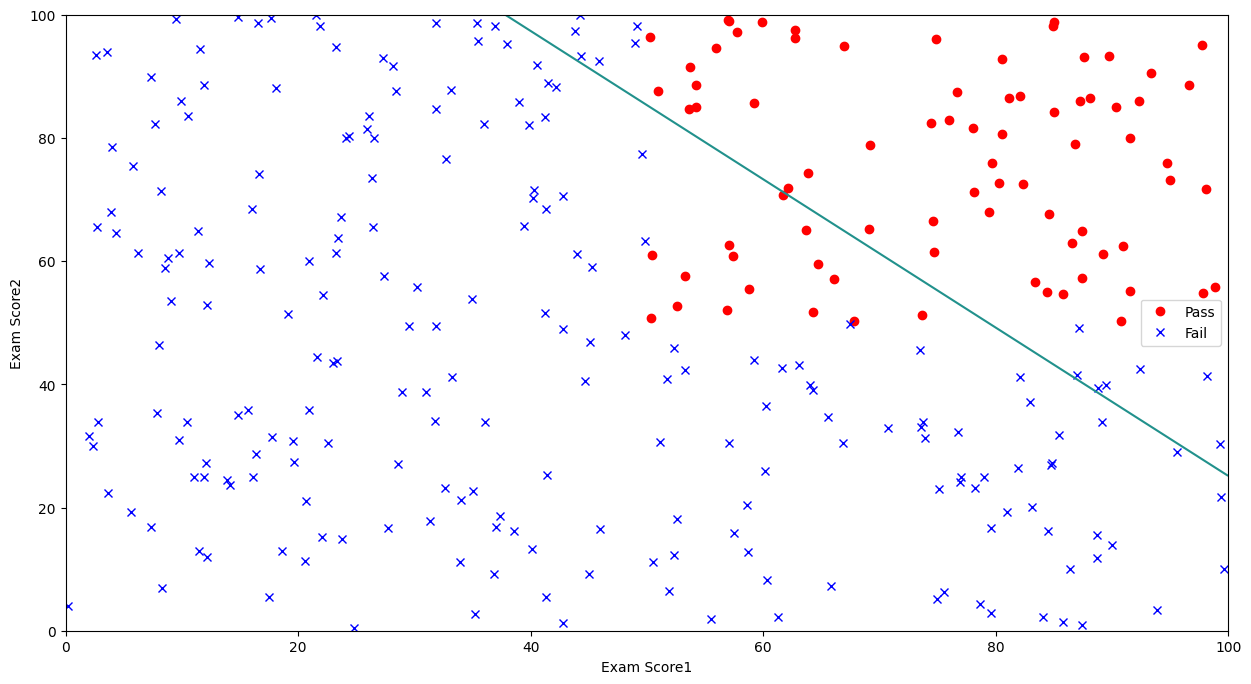

In [16]:
# Create a meshgrid for plotting the decision boundary
x1_range = np.linspace(0,100,100)
x2_range = np.linspace(0,100,100)

xx, yy = np.meshgrid(x1_range, x2_range)

z = new_theta[0] + new_theta[1] * xx + new_theta[2] * yy

# Plot the data points
plt.figure(figsize=(15,8))
plt.plot(positive['Exam Score1'],positive['Exam Score2'],'ro',label='Pass')
plt.plot(negative['Exam Score1'],negative['Exam Score2'],'bx',label='Fail')

# Plot the decision boundary contour
plt.contour(xx, yy, z, 0)
plt.legend()
plt.xlabel('Exam Score1')
plt.ylabel('Exam Score2')
plt.show()

#Part 2: Polynomial Logistic Regression


In [17]:
# Generate Polynomial Features for second-degree logistic regression
def generate_polynomial_features(x1,x2):
  return np.c_[np.ones(x1.shape[0]),x1,x2,x1**2,x2**2,x1*x2]

X = generate_polynomial_features(Xv[:,1],Xv[:,2])


In [18]:
# Initialize theta for the polynomial features
theta1 = np.zeros(X.shape[1])
X.shape

# Calculate the initial cost for the polynomial model
print(cost(X,yv,theta1))

0.6931471805599453


In [19]:
# Update theta for the polynomial model using gradient descent
final_theta = update_theta(theta1,X,yv,0.000001,100000)
print(final_theta)

# Calculate and print the final cost after updating theta
print(cost(X,yv,final_theta))

[-0.00438611 -0.09162634 -0.09772413 -0.00233398 -0.00228842  0.0083548 ]
0.08128596411965797


In [20]:
# Predict the output using the final theta for the polynomial model
predicted_output = predict(final_theta,X)
print(predicted_output)

[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]


In [21]:
# Calculate the accuracy of the predictions for the polynomial model
correct = [ 1 if ((a==1 and b==1) or (a==0 and b ==0)) else 0 for (a,b) in zip(predicted_output,yv)]
acc = (sum(map(int,correct))/len(correct))
print('accuracy = {0}%'.format(acc*100))

accuracy = 98.0%


## --- Plot the Polynomial Decision Boundary ---


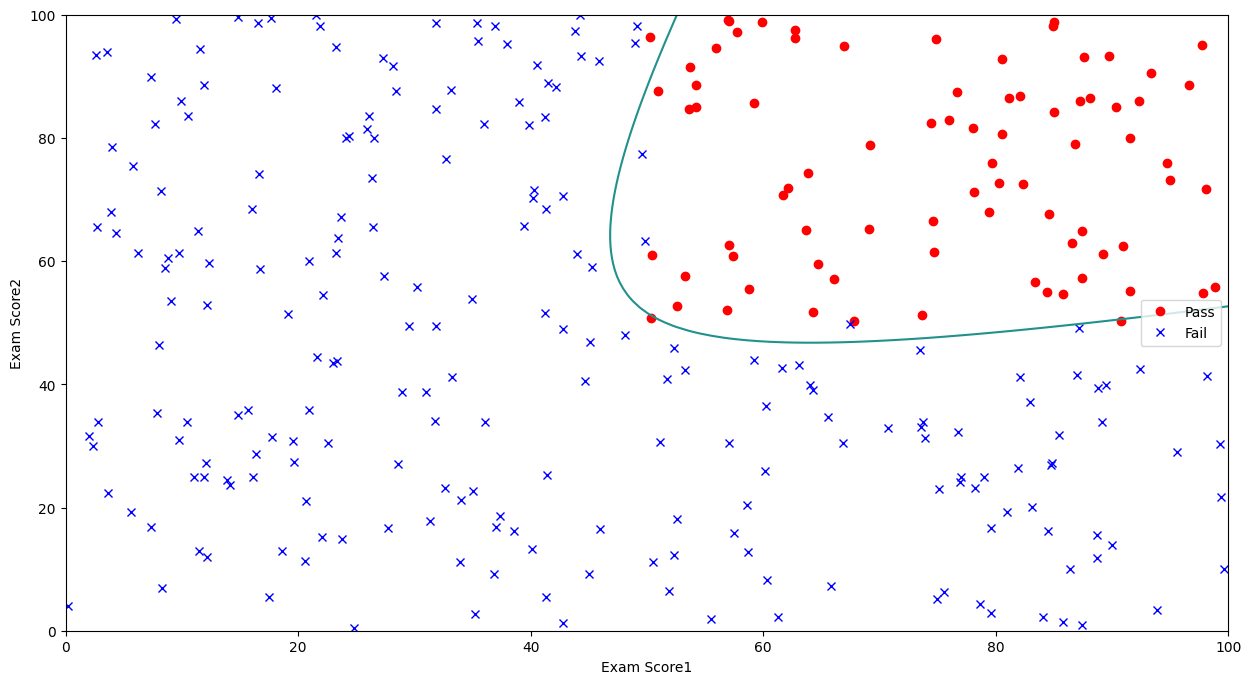

In [22]:
# Create a meshgrid for plotting the polynomial decision boundary
x1_range = np.linspace(0,100,100)
x2_range = np.linspace(0,100,100)

# Plot the decision boundary
xx, yy = np.meshgrid(x1_range, x2_range)

# Compute the polynomial decision boundary
z = (final_theta[0] +
     final_theta[1] * xx +
     final_theta[2] * yy +
     final_theta[3] * xx **2 +
     final_theta[4] * yy **2 +
     final_theta[5] * xx * yy)

# Plot the data points
plt.figure(figsize=(15,8))
plt.plot(positive['Exam Score1'],positive['Exam Score2'],'ro',label='Pass')
plt.plot(negative['Exam Score1'],negative['Exam Score2'],'bx',label='Fail')

# Plot the polynomial decision boundary contour
plt.contour(xx, yy, z, 0)
plt.legend()
plt.xlabel('Exam Score1')
plt.ylabel('Exam Score2')
plt.show()

# Part 3: Polynomial Testing


In [23]:
# Load and Prepare New Data for Testing (25% of the dataset is for testing)
data = pd.read_csv('/content/exam_scores.csv')
new_data = data.iloc[300:400,:]
new_data.head()

,Exam Score1,Exam Score2,Pass
300,15.75,95.26,0
301,86.01,56.21,1
302,94.07,22.16,0
303,41.34,25.46,0
304,53.21,39.96,0


In [24]:
col = new_data.shape[1]

# Create the feature matrix (X_test) and target variable vector (y_test) for the new data
X_test = new_data.iloc[:,0:col-1]
y_test = new_data.iloc[:,col-1:col]

# Convert X_test and y_test to numpy arrays
X_test = np.array(X_test.values)
y_test = np.array(y_test.values)
print(X_test.shape)
print(y_test.shape)

(100, 2)
(100, 1)


In [25]:
# Generate polynomial features for the new test data
X_test = generate_polynomial_features(X_test[:,0],X_test[:,1])

In [26]:
# Predict the output for the test data using the polynomial model
predicted_output_test = predict(final_theta,X_test)
print(predicted_output_test)

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [27]:
# Calculate the accuracy of the predictions on the test data
correct_test = [ 1 if ((a==1 and b==1) or (a==0 and b ==0)) else 0 for (a,b) in zip(predicted_output_test,y_test)]
acc = (sum(map(int,correct_test))/len(correct_test))
print('accuracy = {0}%'.format(acc*100))

accuracy = 100.0%


In [28]:
# Separate the testing data points into positive and negative classes
positive_test = new_data[new_data['Pass'].isin([1])].iloc[:,0:]
negative_test = new_data[new_data['Pass'].isin([0])].iloc[:,0:]


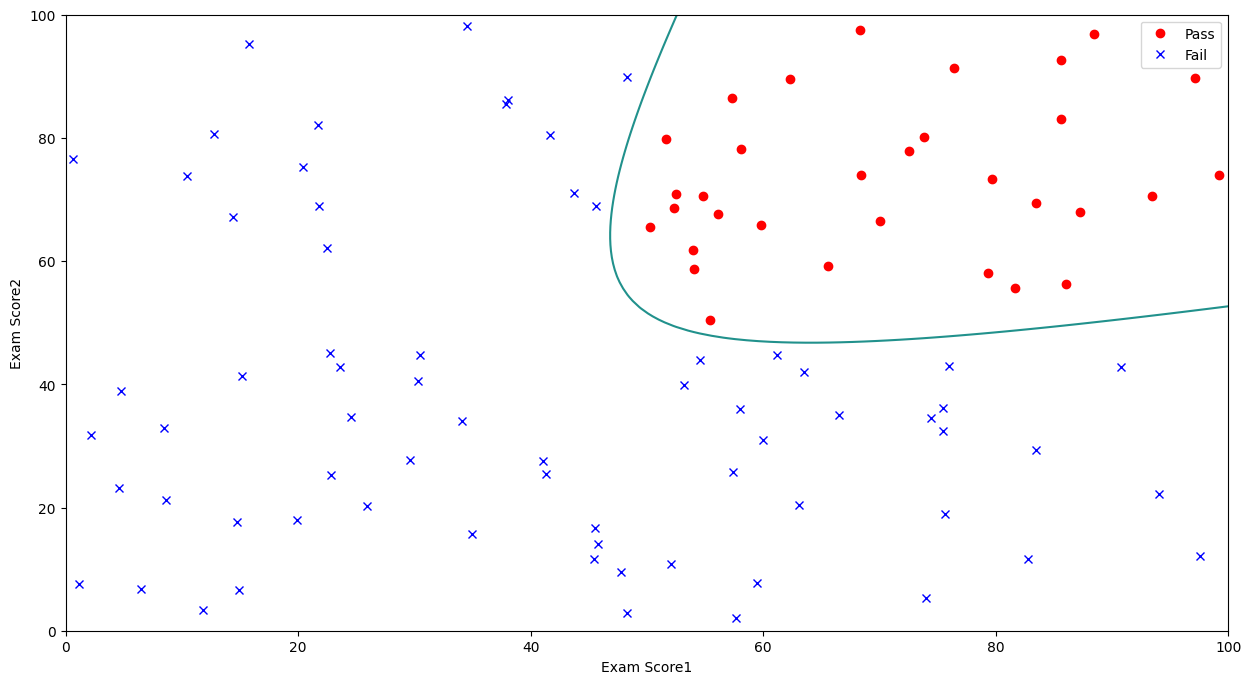

In [29]:
# Plot the predictions for the test data

# Create a meshgrid for plotting the decision boundary
x1_range = np.linspace(0,100,100)
x2_range = np.linspace(0,100,100)

xx, yy = np.meshgrid(x1_range, x2_range)

z = (final_theta[0] +
     final_theta[1] * xx +
     final_theta[2] * yy +
     final_theta[3] * xx **2 +
     final_theta[4] * yy **2 +
     final_theta[5] * xx * yy)

plt.figure(figsize=(15,8))
plt.plot(positive_test['Exam Score1'],positive_test['Exam Score2'],'ro',label='Pass')
plt.plot(negative_test['Exam Score1'],negative_test['Exam Score2'],'bx',label='Fail')

# Plot the polynomial decision boundary contour
plt.contour(xx, yy, z, 0)
plt.legend()
plt.xlabel('Exam Score1')
plt.ylabel('Exam Score2')
plt.show()